# Premier League Data Analysis
## Forrás: https://www.kaggle.com/saife245/english-premier-league
## Készítette: Szász Kristóf

## Az alábbi notebook a 2017-2018-as angol Premier League adatait, meccseit dolgozza fel, így az egyes csapatok, illetve maga a bajnokság tulajdonságait csak erre az időszakra értelmezem.

# Mit láthatunk ebben a notebookban?
    - A csapatok hazai és idegenbeli győztes meccseinek összehasonlítását
    - A csapatok mekkora részben nyernek meccseket az idény során hazai és idegenbeli pályán
    - Mely csapatok voltak a legsportszerűbbek, illetve melyek a legszabálytalanabbak
    - Melyik csapat találta el legtöbbször a kaput és melyik csapat lőtt a legtöbbször a kapura
    - És végül hogyan alakult a bajnokság, azaz a tabella

# FYI:
 - Összesen 20 csapat van
 - Minden csapatnak 38 mérkőzése van, 19 hazai pályán és 19 vendég pályán.

# 1. Adatok importálása

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('2017-18.csv')

In [3]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.5,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41,1.55,1.51,4.60,4.43,6.89,6.44,37,1.65,1.61,2.43,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.5,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40,11.50,10.10,5.60,5.25,1.36,1.32,35,1.70,1.63,2.40,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.5,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41,1.27,1.24,6.55,6.06,15.50,13.67,36,1.71,1.66,2.33,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.6,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41,1.86,1.81,3.65,3.50,5.11,4.82,36,2.19,2.11,1.79,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.8,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40,1.71,1.69,3.85,3.69,6.00,5.50,35,2.17,2.08,1.80,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [4]:
data.count()[0]

380

# 2. Adatfeldolgozás

### Oszlopok leírása

- ``1. oszlop`` : Liga dimenziója - NEM KELL
- ``Date`` : A mérkőzés dátuma
- ``HomeTeam`` : Hazai csapat
- ``AwayTeam`` : Vendég csapat
- ``FTHG`` : Full Time Home Goals - Hazai csapat által lőtt gólok az egész mérkőzésen
- ``FTAG`` : Full Time Away Goals - Vendég csapat által lőtt gólok az egész mérkőzésen
- ``FTR`` : Full Time Result - Mérkőzés végeredménye
- ``HTHG`` : Half Time Home Goals - Hazai csapat által lőtt gólok a félidőben 
- ``HTAG`` : Half Time Away Goals - Vendég csapat által lőtt gólok a félidőben
- ``HTR`` : Halt Time Result - Félidőben lévő végeredmény
- ``Referee`` : Játékvezető - Valószínűleg nem kell
- ``HS`` : Home team Shots - Hazai csapat kapuralövések 
- ``AS`` : Away team Shots - Vendég csapat kapuralövések
- ``HST`` : Home team Shots on Target - Hazai csapat kaput eltaláló lövések
- ``AST`` : Away team Shots on Target - Vendég csapat kaput eltaláló lövések
- ``HF`` : Home team Fouls committed - Hazai csapat által elkövetett szabálytalanságok
- ``AF`` : Away team Fouls committed - Vendég csapat által elkövetett szabálytalanságok
- ``HC`` : Home team Corners - Hazai csapat szögletrúgásai
- ``AC`` : Away team Corners - Vendég csapat szögletrúgásai
- ``HY`` : Home team Yellow cards - Hazai csapat sárgalapok száma
- ``AY`` : Away team Yellow cards - Vendég csapat sárgalapok száma
- ``HR`` : Home team Red cards - Hazai csapat piroslapok száma
- ``AR`` : Away team Red cards - Vendég csapat piroslapok száma
- ``Az utána lévő oszlopok számomra nem lényegesek, hiszen már így is elég sok adat áll rendelkezésemre.``

### Felesleges oszlopok eldobása

In [5]:
data = data.iloc[:,1:23] # az utána lévő oszlopok nem kellenek
data = data.drop('Referee', axis = 1) # számomra nem fontos ki vezette a mérkőzést

In [6]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,27,6,10,3,9,12,9,4,0,1,0,0
1,12/08/17,Brighton,Man City,0,2,A,0,0,D,6,14,2,4,6,9,3,10,0,2,0,0
2,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,19,10,6,5,16,11,8,5,3,3,2,0
3,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,4,6,7,19,12,9,1,3,0,0
4,12/08/17,Everton,Stoke,1,0,H,1,0,H,9,9,4,1,13,10,6,7,1,1,0,0


In [7]:
data.isnull().sum() # nincsenek NULL értékek

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

# 3. Vizualizáció

In [8]:
homeTeamWins = data[data.FTR == 'H'].groupby(data.HomeTeam).describe().FTHG['count'] # hányszor győzött egy csapat hazai pályán

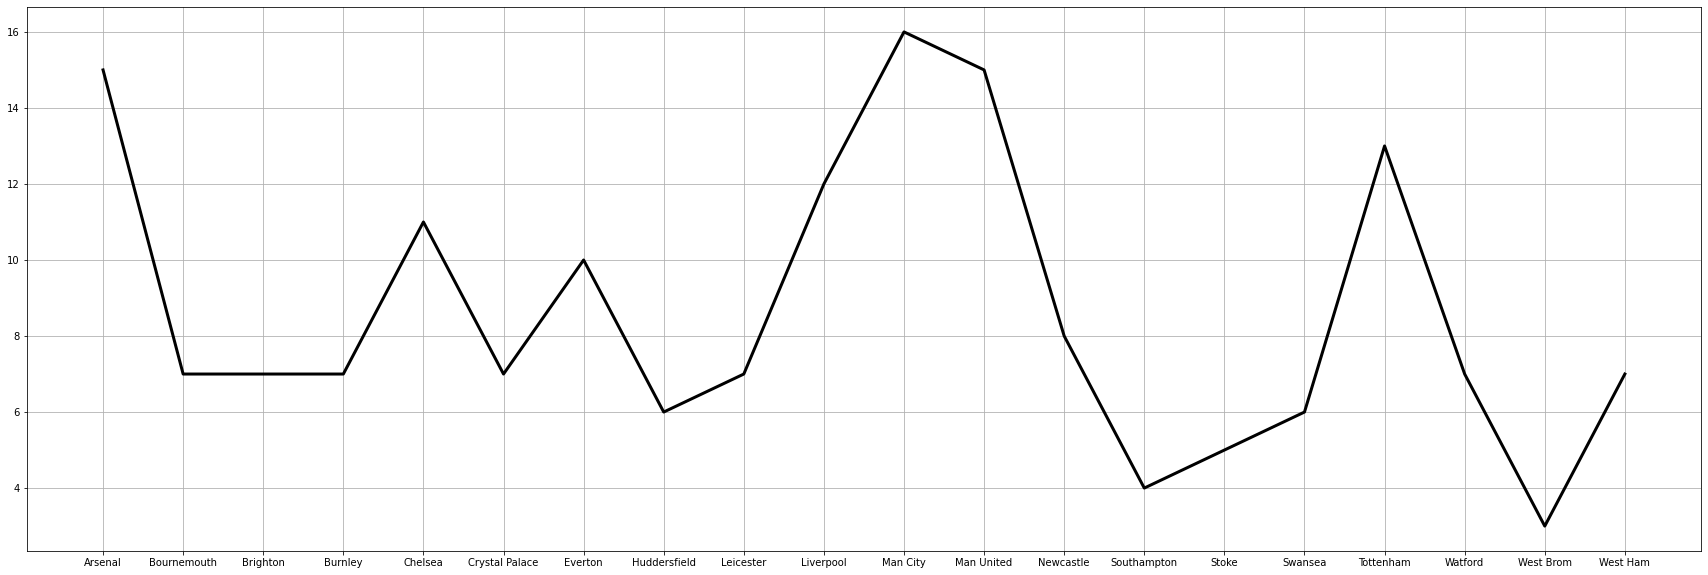

In [9]:
plt.figure(figsize=(30,10))
plt.plot(homeTeamWins, color = 'black', linewidth = 3)
plt.grid()

In [10]:
awayTeamWins = data[data.FTR == 'A'].groupby(data.AwayTeam).describe().FTHG['count']

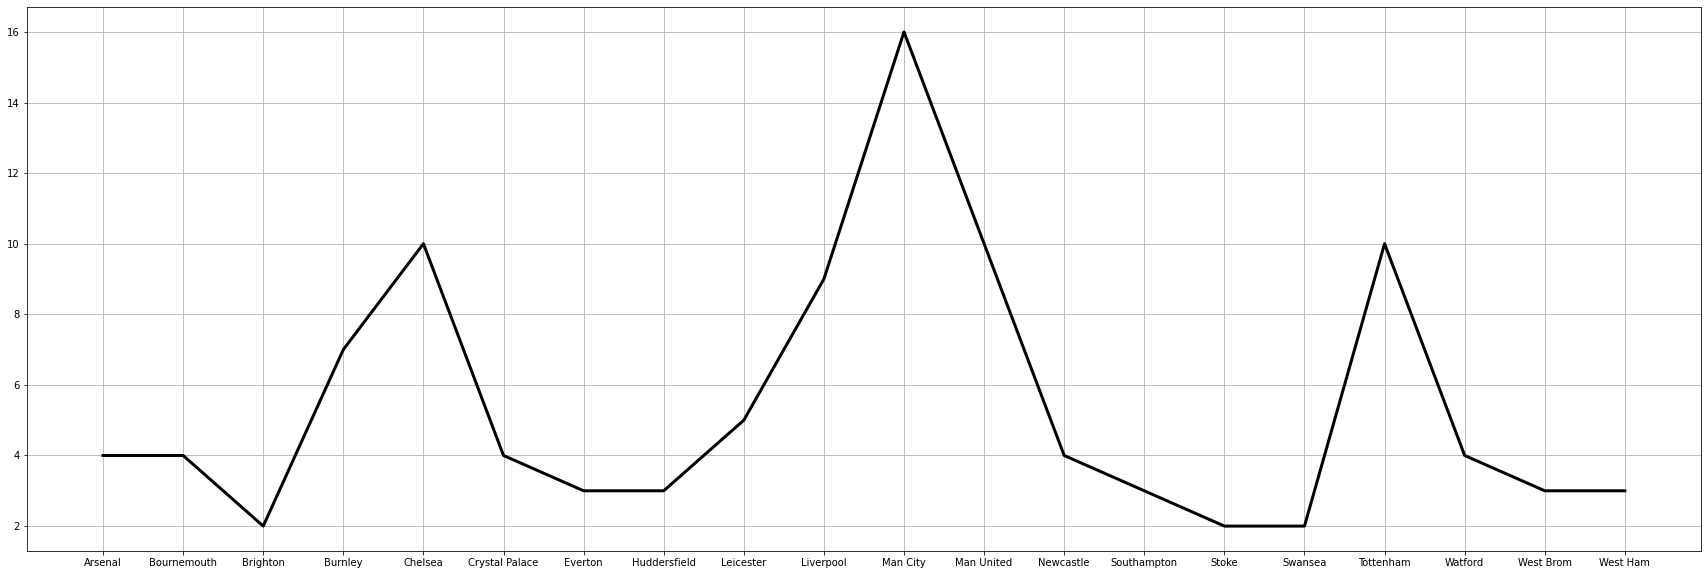

In [11]:
plt.figure(figsize=(30,10))
plt.plot(awayTeamWins, color = 'black', linewidth = 3)
plt.grid()

In [12]:
WinsData = pd.DataFrame({'homeWins':homeTeamWins, 'awayWins':awayTeamWins})

Text(0, 0.5, 'Meccsek száma')

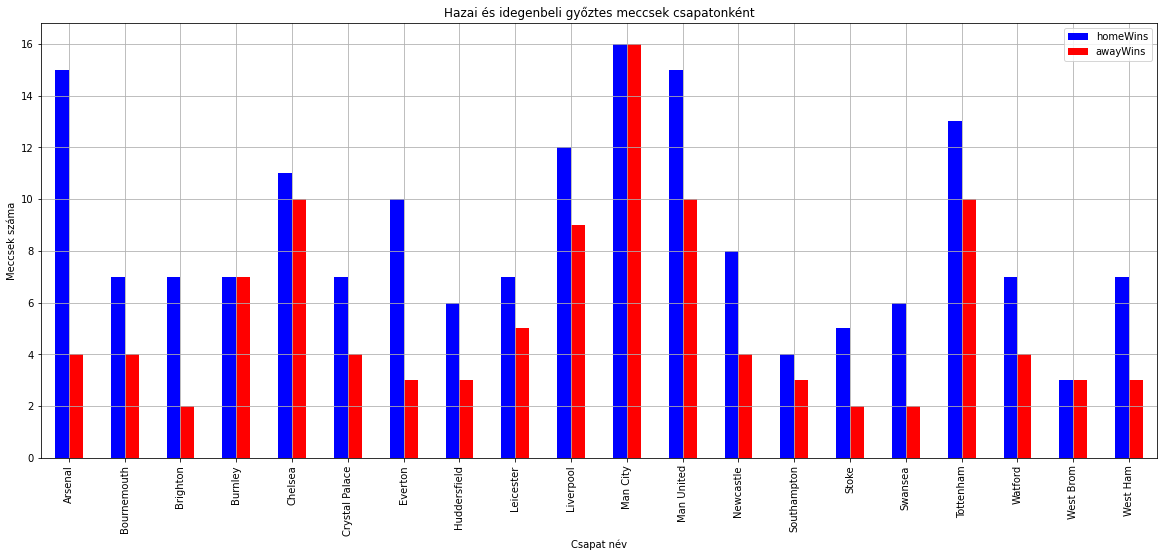

In [13]:
HomeAndAwayWinsByTeams =  WinsData.plot(title = 'Hazai és idegenbeli győztes meccsek csapatonként', figsize = (20,8), grid = True, kind='bar', color = ['blue', 'red'])
HomeAndAwayWinsByTeams.set_xlabel("Csapat név")
HomeAndAwayWinsByTeams.set_ylabel("Meccsek száma")

### A csapatok hány százaléka nyert többször hazai pályán, mint idegenben?

In [14]:
homeWinsPercentageByTeams = (WinsData[WinsData.homeWins > WinsData.awayWins].count() / WinsData.count()).homeWins * 100
homeWinsPercentageByTeams

85.0

### A csapatok hány százaléka nyert vagy játszott döntetlent több alkalommal hazai pályán, mint idegenben?

In [15]:
homeWinsOrDrawPercentageByTeams = (WinsData[WinsData.homeWins >= WinsData.awayWins].count() / WinsData.count()).homeWins * 100
homeWinsOrDrawPercentageByTeams

100.0

### A csapatok hány százeléka nyert többször idegenben, mint hazai pályán?

In [16]:
awayWinsPercentageByTeams = 100 - homeWinsOrDrawPercentageByTeams
awayWinsPercentageByTeams

0.0

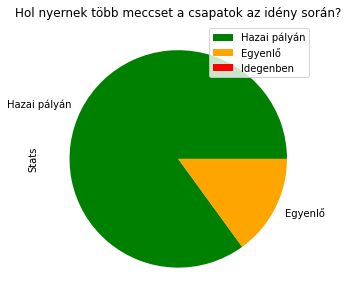

In [17]:
df = pd.DataFrame({'Stats': [homeWinsPercentageByTeams, (100 - homeWinsPercentageByTeams) - awayWinsPercentageByTeams , awayWinsPercentageByTeams]},
                  index=['Hazai pályán', 'Egyenlő', 'Idegenben'])
plot = df.plot.pie(y='Stats', figsize=(5, 5), title = 'Hol nyernek több meccset a csapatok az idény során?', colors = ['green', 'orange', 'red'])

In [18]:
FoulsAsHomeTeam = data.HF.groupby(data.HomeTeam).sum()

In [19]:
FoulsAsAwayTeam = data.AF.groupby(data.AwayTeam).sum()

In [20]:
FoulsData = pd.DataFrame({'FoulsAsHomeTeam':FoulsAsHomeTeam, 'FoulsAsAwayTeam':FoulsAsAwayTeam})

Text(0, 0.5, 'Szabálytalanságok száma')

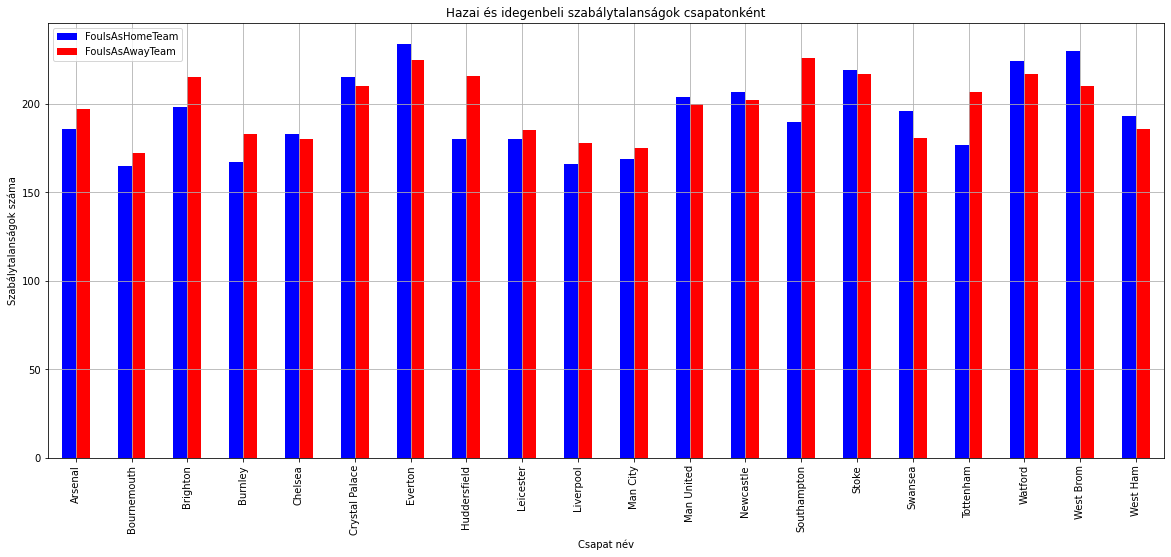

In [21]:
HomeAndAwayFoulsByTeams =  FoulsData.plot(title = 'Hazai és idegenbeli szabálytalanságok csapatonként', figsize = (20,8), grid = True, kind='bar', color = ['blue','red'])
HomeAndAwayFoulsByTeams.set_xlabel("Csapat név")
HomeAndAwayFoulsByTeams.set_ylabel("Szabálytalanságok száma")

In [22]:
SummarizedFoulsByTeams = FoulsData.FoulsAsHomeTeam + FoulsData.FoulsAsAwayTeam

### Legkevesebb szabálytalanságot elkövető csapatok

In [23]:
SummarizedFoulsByTeams.sort_values().head()

Bournemouth    337
Liverpool      344
Man City       344
Burnley        350
Chelsea        363
dtype: int64

### Legtöbb szabálytalanságot elkövető csapatok

In [24]:
SummarizedFoulsByTeams.sort_values(ascending = False).head()

Everton           459
Watford           441
West Brom         440
Stoke             436
Crystal Palace    425
dtype: int64

### Kapuralövések csapatonként

In [25]:
ShotsAsHomeTeam = data.HS.groupby(data.HomeTeam).sum()

In [26]:
ShotsAsAwayTeam = data.AS.groupby(data.AwayTeam).sum()

In [27]:
ShotsData = pd.DataFrame({'ShotsAsHomeTeam':ShotsAsHomeTeam, 'ShotsAsAwayTeam':ShotsAsAwayTeam})

Text(0, 0.5, 'Kapura lövések csapatonként')

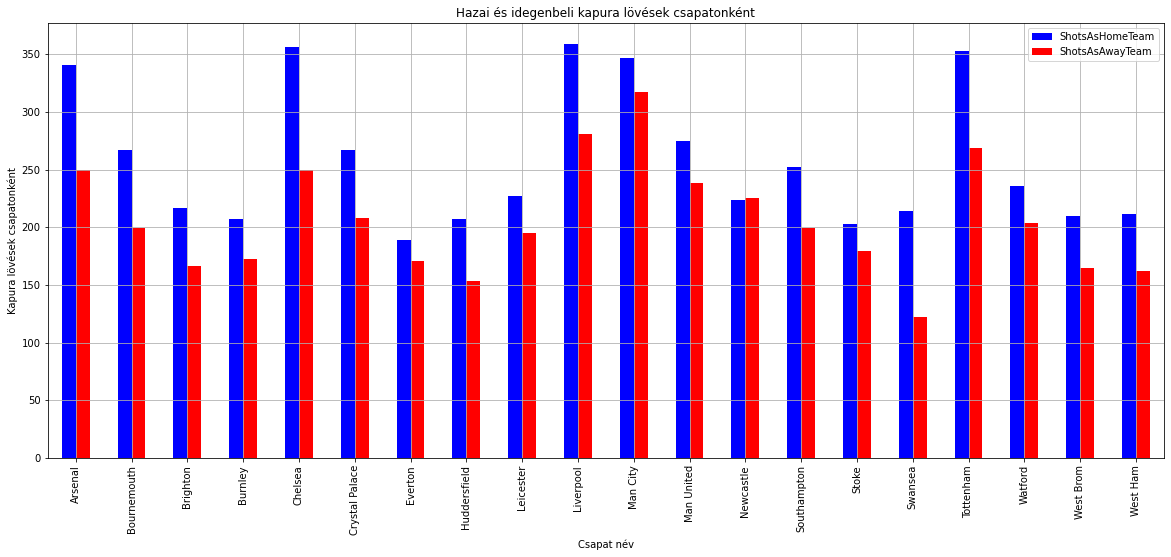

In [28]:
ShotsDataByTeams =  ShotsData.plot(title = 'Hazai és idegenbeli kapura lövések csapatonként', figsize = (20,8), grid = True, kind='bar', color = ['blue', 'red'])
ShotsDataByTeams.set_xlabel("Csapat név")
ShotsDataByTeams.set_ylabel("Kapura lövések csapatonként")

In [29]:
SummarizedShotsData = ShotsData.ShotsAsHomeTeam + ShotsData.ShotsAsAwayTeam

### A csapatok hány százaléka lőtt az idény során az ellenfél kapujára többször amikor hazai pályán szerepelt, mint amikor idegenben

In [30]:
(ShotsData[ShotsData.ShotsAsHomeTeam > ShotsData.ShotsAsAwayTeam].count() / ShotsData.count()).ShotsAsHomeTeam * 100

95.0

### Kaput eltaláló lövések csapatonként

In [31]:
ShotsOnTargetAsHomeTeam = data.HST.groupby(data.HomeTeam).sum()

In [32]:
ShotsOnTargetAsAwayTeam = data.AST.groupby(data.AwayTeam).sum()

In [33]:
ShotsOnTargetData = pd.DataFrame({'ShotsOnTargetAsHomeTeam':ShotsOnTargetAsHomeTeam, 'ShotsOnTargetAsAwayTeam':ShotsOnTargetAsAwayTeam})

Text(0, 0.5, 'Kaput eltaláló lövések csapatonként')

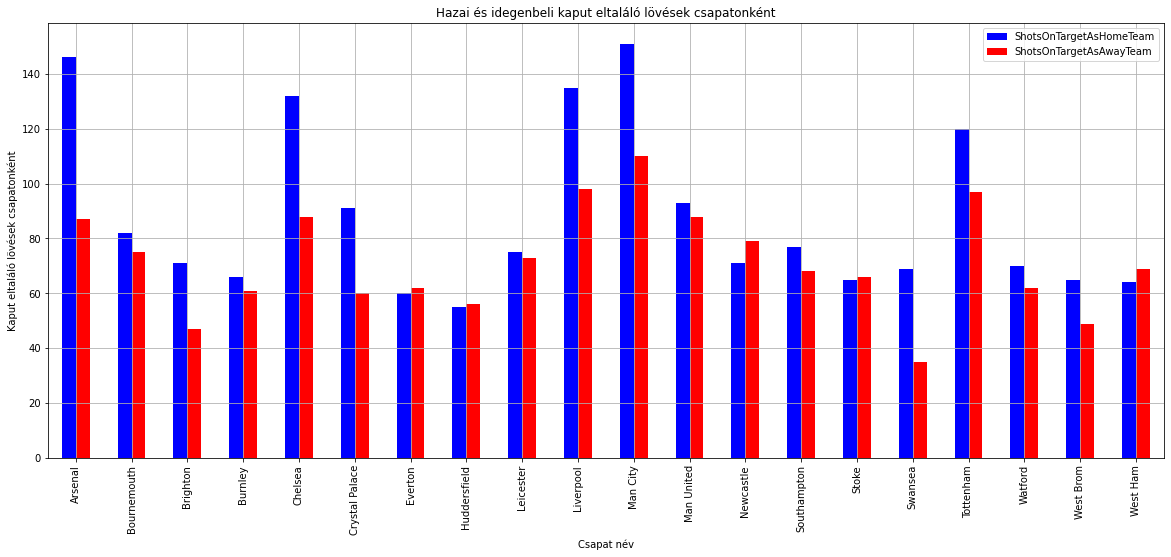

In [34]:
ShotsOnTargetsByTeams =  ShotsOnTargetData.plot(title = 'Hazai és idegenbeli kaput eltaláló lövések csapatonként', figsize = (20,8), grid = True, kind='bar', color = ['blue', 'red'])
ShotsOnTargetsByTeams.set_xlabel("Csapat név")
ShotsOnTargetsByTeams.set_ylabel("Kaput eltaláló lövések csapatonként")

### A csapatok hány százaléka találja el többször hazai csapatként az ellenfél kapuját, mint vendég csapatként

In [35]:
((ShotsOnTargetData[ShotsOnTargetData.ShotsOnTargetAsHomeTeam > ShotsOnTargetData.ShotsOnTargetAsAwayTeam].count() / ShotsOnTargetData.count()) * 100).ShotsOnTargetAsHomeTeam

75.0

In [36]:
SummarizedShotsOnTargetData = ShotsOnTargetData.ShotsOnTargetAsHomeTeam + ShotsOnTargetData.ShotsOnTargetAsAwayTeam

### Gólok száma csapatonként

In [37]:
FullTimeGoalsAsHomeTeam = data.FTHG.groupby(data.HomeTeam).sum()

In [38]:
FullTimeGoalsAsAwayTeam = data.FTAG.groupby(data.AwayTeam).sum()

In [39]:
FullTimeGoalsData = pd.DataFrame({'FullTimeGoalsAsHomeTeam':FullTimeGoalsAsHomeTeam, 'FullTimeGoalsAsAwayTeam':FullTimeGoalsAsAwayTeam})

Text(0, 0.5, 'Gólok csapatonként')

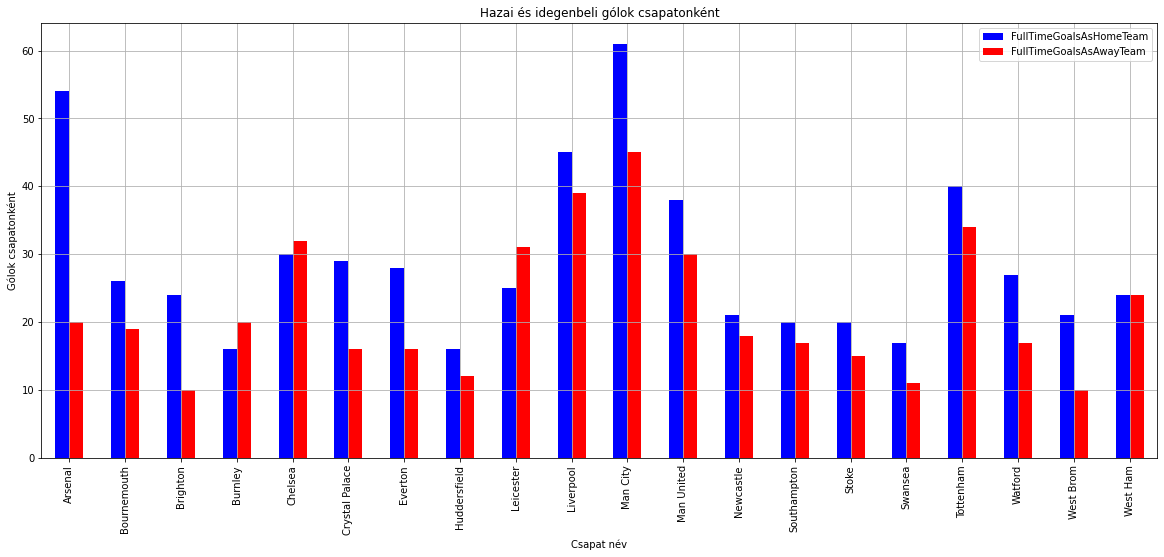

In [40]:
FullTimeGoalsDataByTeams =  FullTimeGoalsData.plot(title = 'Hazai és idegenbeli gólok csapatonként', figsize = (20,8), grid = True, kind='bar', color = ['blue', 'red'])
FullTimeGoalsDataByTeams.set_xlabel("Csapat név")
FullTimeGoalsDataByTeams.set_ylabel("Gólok csapatonként")

### A csapatok hány százaléka szerez több gólt hazai csapatként, mint vendég csapatként 

In [41]:
((FullTimeGoalsData[FullTimeGoalsData.FullTimeGoalsAsHomeTeam > FullTimeGoalsData.FullTimeGoalsAsAwayTeam].count() / FullTimeGoalsData.count()) * 100).FullTimeGoalsAsHomeTeam

80.0

In [42]:
SummarizedFullTimeGoalsData = FullTimeGoalsData.FullTimeGoalsAsHomeTeam + FullTimeGoalsData.FullTimeGoalsAsAwayTeam
SummarizedFullTimeGoalsData

Arsenal            74
Bournemouth        45
Brighton           34
Burnley            36
Chelsea            62
Crystal Palace     45
Everton            44
Huddersfield       28
Leicester          56
Liverpool          84
Man City          106
Man United         68
Newcastle          39
Southampton        37
Stoke              35
Swansea            28
Tottenham          74
Watford            44
West Brom          31
West Ham           48
dtype: int64

In [43]:
Shots_ShotsOnTarget_Goals = pd.DataFrame({'SummarizedShotsData':SummarizedShotsData, 
                                          'SummarizedShotsOnTargetData':SummarizedShotsOnTargetData, 
                                          'SummarizedFullTimeGoalsData':SummarizedFullTimeGoalsData})

Text(0, 0.5, 'Kapuralövések/Kaput eltaláló lövések/Gólok')

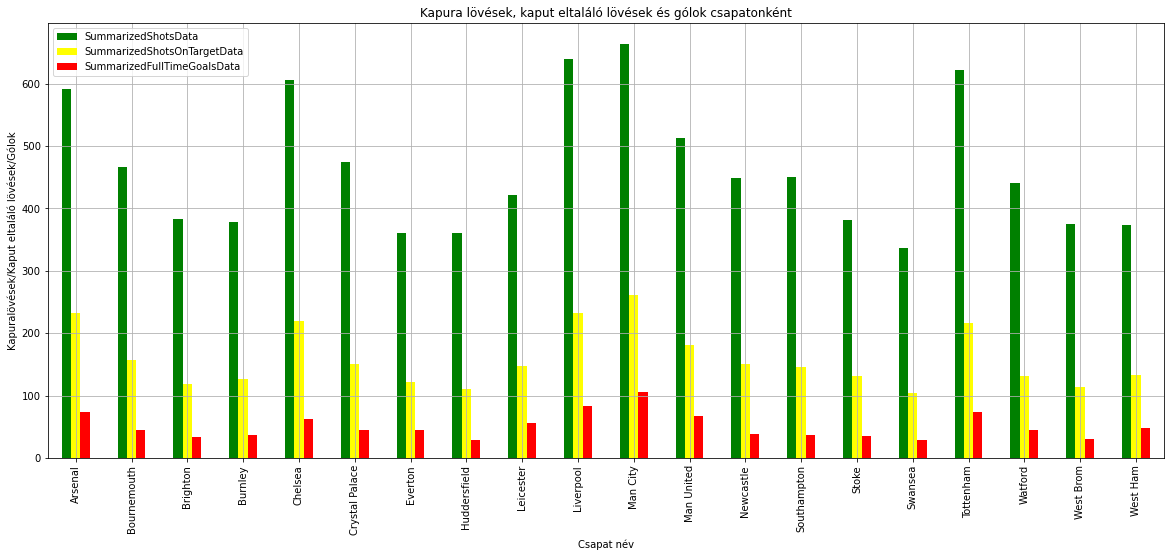

In [44]:
Shots_ShotsOnTarget_GoalsPlot =  Shots_ShotsOnTarget_Goals.plot(title = 'Kapura lövések, kaput eltaláló lövések és gólok csapatonként', figsize = (20,8), grid = True, kind='bar', color = ['green','yellow','red'])
Shots_ShotsOnTarget_GoalsPlot.set_xlabel("Csapat név")
Shots_ShotsOnTarget_GoalsPlot.set_ylabel("Kapuralövések/Kaput eltaláló lövések/Gólok")

### Ahogy látható a kapuralövés egyenesen arányos a kaput eltaláló lövésekkel és a gólok számával, ezért jön ki az eredményül, hogy a legtöbbet kapuralövő csapatok találták el legtöbbször a kaput, illetve ezek a csapatok is szerezték a legtöbb gólt az idény során

In [45]:
SummarizedShotsData.sort_values(ascending = False).head()

Man City     664
Liverpool    640
Tottenham    622
Chelsea      606
Arsenal      591
dtype: int64

In [46]:
SummarizedShotsOnTargetData.sort_values(ascending = False).head()

Man City     261
Liverpool    233
Arsenal      233
Chelsea      220
Tottenham    217
dtype: int64

In [47]:
SummarizedFullTimeGoalsData.sort_values(ascending = False).head()

Man City      106
Liverpool      84
Tottenham      74
Arsenal        74
Man United     68
dtype: int64

### Viszont ez még nem feltétlenül jelenti azt, hogy arányaiban tekintve is ők a legjobb csapatok, ezért ha elosztjuk a gólszámot a kapuralövésekkel, láthatjuk, hogy mely csapatok lőnek a legpontosabban kapura vagy legalábbis melyik csapatok lőnek inkább akkor, amikor úgy érzik gólt tudnak szerezni

In [48]:
((SummarizedFullTimeGoalsData / SummarizedShotsData) * 100).sort_values(ascending = False).head()

Man City      15.963855
Leicester     13.270142
Man United    13.255361
Liverpool     13.125000
West Ham      12.868633
dtype: float64

### Az West Ham és Leicester eddig nem szerepelt egyszer sem a legjobb csapatok között az adatokat tekintve viszont azt látható, hogy a gólszám/összes lövés esetén igen jól szerepeltek, a többi csapat eddig is a legaktívabbak között volt

### És új meglepetés emberként az Arsenal is felküzdötte magát a legjobbak közé, sőt ebben a statisztikában ő is lett a  legjobb, tehát ha kaput eltaláló lövésekből ekkora százalékban szereznek gólt az alábbi csapatok, ami számomra meglepően magas

In [49]:
((SummarizedShotsOnTargetData / SummarizedShotsData) * 100).sort_values(ascending = False).head()

Arsenal      39.424704
Man City     39.307229
Liverpool    36.406250
Chelsea      36.303630
West Ham     35.656836
dtype: float64

# Tabella

In [52]:
teams = data.HomeTeam.unique()
teams.sort()

In [53]:
LeagueTable = pd.DataFrame({'Team':teams, 'Points':0}, index = teams)
##LeagueTable.sort_values('Points')
LeagueTable.index = np.arange(1, len(LeagueTable) + 1)

In [54]:
def leaugeTablePoints(dataframe):
    if dataframe['FTR'] == 'H':
        LeagueTable.at[LeagueTable.loc[LeagueTable.Team == dataframe.HomeTeam].index[0], 'Points'] += 3
    elif dataframe['FTR'] == 'A':
        LeagueTable.at[LeagueTable.loc[LeagueTable.Team == dataframe.AwayTeam].index[0], 'Points'] += 3
    elif dataframe['FTR'] == 'D':
        LeagueTable.at[LeagueTable.loc[LeagueTable.Team == dataframe.HomeTeam].index[0], 'Points'] += 1
        LeagueTable.at[LeagueTable.loc[LeagueTable.Team == dataframe.AwayTeam].index[0], 'Points'] += 1

In [55]:
data.apply(leaugeTablePoints, axis = 1)

0      None
1      None
2      None
3      None
4      None
       ... 
375    None
376    None
377    None
378    None
379    None
Length: 380, dtype: object

In [56]:
LeagueTable = LeagueTable.sort_values('Points', ascending = False)
LeagueTable['Rank'] = range(1,21)

In [57]:
LeagueTable.style.hide_index()

Team,Points,Rank
Man City,100,1
Man United,81,2
Tottenham,77,3
Liverpool,75,4
Chelsea,70,5
Arsenal,63,6
Burnley,54,7
Everton,49,8
Leicester,47,9
Crystal Palace,44,10


### Egy kis érdekesség

In [58]:
data.apply(min, axis = 0)

Date        01/01/18
HomeTeam     Arsenal
AwayTeam     Arsenal
FTHG               0
FTAG               0
FTR                A
HTHG               0
HTAG               0
HTR                A
HS                 2
AS                 0
HST                0
AST                0
HF                 2
AF                 3
HC                 0
AC                 0
HY                 0
AY                 0
HR                 0
AR                 0
dtype: object

In [59]:
data.apply(max, axis = 0)

Date        31/12/17
HomeTeam    West Ham
AwayTeam    West Ham
FTHG               7
FTAG               6
FTR                H
HTHG               4
HTAG               3
HTR                H
HS                35
AS                30
HST               15
AST               14
HF                19
AF                26
HC                18
AC                13
HY                 6
AY                 7
HR                 2
AR                 1
dtype: object

In [60]:
data[data.FTHG == 7]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
73,14/10/17,Man City,Stoke,7,2,H,3,1,H,20,5,11,1,5,8,5,0,0,1,0,0


https://www.google.com/search?q=2017+18+man+city+stoke&oq=2017+18+man+city+stoke&aqs=chrome..69i57j33i22i29i30.6206j0j9&sourceid=chrome&ie=UTF-8#sie=m;/g/11ggb123dt;2;/m/02_tc;dt;fp;1;;